In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os

if not os.getcwd()[-4:] == 'data':
    os.chdir('data')
os.getcwd()

'C:\\Users\\Can\\CINPLA\\DeepLabCutAnalysis\\data'

# Example usage of DeepLabCut -analysis

## Extract positions on a video using a trained model

Open anaconda prompt and `activate deeplabcut` and navigate to the DeepLabCut folder:

`cd Documents\apps\DeepLabCut-master\Analysis-tools`

Then you need to set a couple of environment variables:
`set TF_CUDNN_USE_AUTOTUNE=0`
`set CUDA_VISIBLE_DEVICES=0`

Crop the videos using ....

Now we are ready to run the DeepLabCut model on the new video.

Place all the videos you want to analyse in `DeepLabCut-master/videos`. Check the settings in `DeepLabCut-master/myconfig_analysis.py`.

Now run AnalyzeVideos:

`python AnalyzeVideos.py`

The output labels should be saved in the video as csv files and can be uploaded in Python

In [3]:
from dlca.readers import DLCsv
from dlca.analysis import DLCPos
import numpy as np
import matplotlib.pylab as plt

In [4]:
local_file = DLCsv('test.csv')

In [5]:
analysis = DLCPos(local_file.clean_df(), 'hor', notebook=True)

C:\ProgramData\Anaconda3\lib\site-packages\dlca\readers.py:94: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, max_dif))


C:\ProgramData\Anaconda3\lib\site-packages\dlca\analysis.py:218: RuntimeWarning: invalid value encountered in greater
  nose_test = np.logical_or(np.greater(nose, self.lower_border),
C:\ProgramData\Anaconda3\lib\site-packages\dlca\analysis.py:219: RuntimeWarning: invalid value encountered in less
  np.less(nose, self.upper_border))
C:\ProgramData\Anaconda3\lib\site-packages\dlca\analysis.py:222: RuntimeWarning: invalid value encountered in greater
  where=nose_test),
C:\ProgramData\Anaconda3\lib\site-packages\dlca\analysis.py:224: RuntimeWarning: invalid value encountered in greater
  where=nose_test),
C:\ProgramData\Anaconda3\lib\site-packages\dlca\analysis.py:230: RuntimeWarning: invalid value encountered in less
  where=nose_test),
C:\ProgramData\Anaconda3\lib\site-packages\dlca\analysis.py:232: RuntimeWarning: invalid value encountered in less
  where=nose_test),


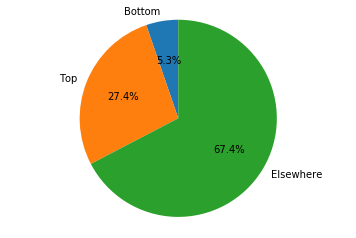

None


In [6]:
print(analysis.position_preference(plot=True))

In [7]:
local_file

DLCsv("test.csv"):
norm=False, inv_y=False, vid=None,
x_max=None, y_max=None

In [8]:
import matplotlib.pylab as plt


plt.show()

In [9]:
rw = local_file.raw_df
x_t = rw['tail']['x']
y_t = rw['tail']['y']

x_n = rw['nose']['x']
y_n = rw['nose']['y']

In [10]:
clean = local_file.clean_df()
x_tc = clean['tail']['x']
y_tc = clean['tail']['y']

x_nc = clean['nose']['x']
y_nc = clean['nose']['y']

C:\ProgramData\Anaconda3\lib\site-packages\dlca\readers.py:94: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, max_dif))


In [19]:
int_pol = local_file.interpolate_df(save=True)
x_ti = int_pol['tail']['x']
y_ti = int_pol['tail']['y']

x_ni = int_pol['nose']['x']
y_ni = int_pol['nose']['y']

C:\ProgramData\Anaconda3\lib\site-packages\dlca\readers.py:94: RuntimeWarning: invalid value encountered in greater_equal
  bad_values = deque(np.greater_equal(ele_dif, max_dif))


x
y
x
y
x
y
x
y


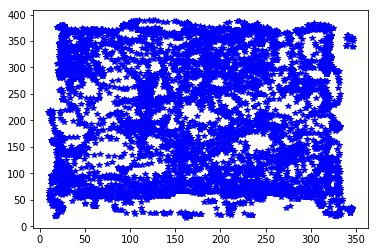

In [12]:
plt.plot(x_nc, y_nc, 'b*')

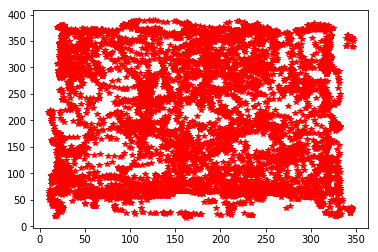

In [13]:
plt.plot(x_nc, y_nc, 'r*')

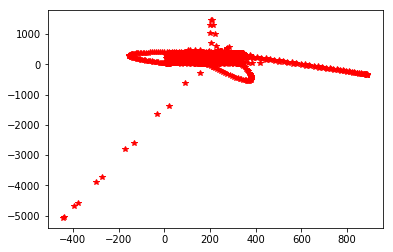

In [20]:
plt.plot(x_ni, y_ni, 'r*')

In [30]:
for v in x_nc.values:
    print(v)

70.4303753376007
79.63494610786437
86.83938980102539
95.829772233963
100.60143899917604
107.48493909835815
113.44385027885436
112.79637002944945
113.51899075508119
119.60824823379515
125.13637602329254
127.44415187835692
132.6132513284683
140.23375065624714
147.29468339681625
150.6401324272156
153.1189579963684
158.5828237533569
160.93048405647278
170.10024452209473
173.68404066562653
173.73255503177643
179.21101993322372
184.7509164810181
187.32021284103396
190.06625270843503
nan
nan
nan
187.75708021223545
187.4342363476753
186.8545608520508
184.76442432403562
184.67548036575317
186.12665176391602
185.9757273197174
185.74377155303955
189.30267214775085
190.41666793823242
177.5433170795441
164.68724977970126
151.20516872406006
145.38289022445682
140.27358156442642
135.35431981086728
132.71397626399994
127.23933482170105
125.505229473114
122.61541604995728
118.74460101127623
119.35131049156188
117.70579862594604
118.01152443885805
118.75742316246031
123.16639292240143
128.28624963760376

127.37314176559448
125.79152405261992
124.08873081207277
122.41613531112672
121.49266147613524
122.0318956375122
120.01109075546265
118.7859103679657
118.12320232391356
117.50951957702637
116.3861665725708
114.68917655944824
112.72027730941772
111.88714003562927
111.39488244056702
111.30806922912598
111.8515408039093
112.81766796112059
112.13609075546265
110.57446718215942
110.76795625686646
111.03269934654236
112.16333103179932
112.62660360336305
112.63001251220705
112.78100252151488
113.28175020217896
113.20180702209473
113.59183168411256
115.09827768802643
115.48317188024521
115.39045286178587
115.17333620786668
115.20245736837387
112.60007619857788
108.33208519220352
103.16075730323792
98.56019842624664
95.6076157093048
95.14182472229004
96.26407384872437
97.45334529876708
98.56270074844359
99.2334508895874
99.61867240071295
99.85952131450176
100.37722343206406
100.82817697525023
100.84778887033464
101.03153097629549
100.97778481245041
100.75531733036041
100.61551761627196
100.6416

259.9716780837625
260.62751281261444
260.44173467159266
260.27695646882063
260.72422844171524
261.45950794219965
261.09707510471344
260.86267912387854
260.8456252813339
260.90934723615646
260.30629768967634
259.1009252071381
258.7042713165283
257.9592230319977
250.9100799560547
243.79116390645504
240.1130928993225
237.2137598991394
233.43204927444458
228.00526734767482
227.1883594989777
223.63977432250977
223.08408641815186
223.2107572555542
222.1067943572998
217.9649000167847
216.3974142074585
214.20215678215027
207.9508676528931
204.4139402806759
197.12142395973208
191.77178049087524
186.40679931640625
181.7113863229752
178.38773393630981
175.15913033485413
175.2745361328125
174.0492076873779
173.33250617980957
173.50482261180878
174.84320735931396
184.88183355331418
192.5771656036377
201.19222164154053
204.36591684818268
205.2576702833176
204.6709928512573
203.8716139793396
203.3180112838745
202.44217443466187
204.31649839878082
208.09973812103271
208.30211114883426
208.046857357025

219.30800914764404
215.80410504341125
215.58915281295776
215.17156386375427
215.71949219703674
218.21522855758667
223.77075386047363
228.01374933309853
237.1649465560913
244.02199330925941
247.678528547287
248.04737663269043
251.6040544807911
251.16230297088626
242.17103624343872
233.2845277786255
226.86938190460202
219.8420799076557
218.80225038528442
221.58651328086853
221.98498439788816
226.99346542358398
228.29595130681992
230.95226836204532
231.71306920051572
233.88966274261475
232.9352297782898
234.06326341629028
238.0972416400909
239.870512008667
240.7702031135559
239.9528522491455
238.5187478065491
232.16943073272702
222.48430252075195
228.50117659568787
231.87540149688718
231.0526258945465
231.31971192359924
227.32786858081815
225.66716957092285
225.78850317001343
225.47138261795044
225.4272174835205
225.91637086868286
223.41679549217224
220.2818555831909
219.23062133789062
218.787588596344
215.64092874526975
213.85646843910217
213.1504560709
213.20487129688263
212.95312416553

247.77736902236938
248.38921880722046
248.2200469970703
247.5467369556427
247.4883873462677
247.5332057476044
246.874253988266
247.0631742477417
252.22724723815918
253.8149189949036
258.4237146377564
260.0704866871238
261.4142594337464
263.8027594089508
263.8761961460113
266.6623492240906
266.7254638671875
266.8891844749451
263.3351435661316
263.61447048187256
264.5464057922363
264.20161867141724
264.45229530334467
264.3569755554199
258.7337937355041
256.57569456100464
256.8470935821533
251.66104221343997
241.96474504470825
231.01002192497253
228.4583578109741
223.7283182144165
215.49825501441958
203.69422388076785
189.97661864757538
175.54906964302063
163.72326484322545
152.87802600860599
144.08107686042788
136.12797784805298
126.65585231781006
118.45933437347412
111.14089179039
102.54910469055176
96.16628122329712
89.54411602020264
81.4911026954651
74.64887046813966
69.51481139659882
61.72945606708527
59.12880039215088
58.410640239715576
57.23340892791748
58.946682453155525
60.679644

201.83916521072388
203.45557218790054
206.7557907104492
208.8548765182495
211.1028537750244
213.72036969661715
214.08300495147702
216.4760270118713
216.35660934448242
215.8482806682587
218.65561294555664
219.3025449514389
222.7178330421448
226.5180048942566
231.4691250324249
235.58344674110413
241.0425682067871
245.5602030754089
253.85393404960632
257.4506592750549
260.39729157090187
263.23583245277405
263.48120355606085
263.35703492164606
264.05744981765747
264.12789630889887
265.4877347946167
265.0894913673401
265.41799926757807
264.8693904876709
264.3416662216186
264.26736497879034
262.83020305633545
261.0402985811233
260.26451444625854
258.5666959285736
257.57842350006104
256.2951011657715
251.508752822876
252.03781127929688
252.93021583557132
254.05411624908447
255.7068381309509
254.2004084587097
254.08823490142825
259.69770151376724
265.5519933700561
270.4132845401764
274.6140064001084
274.30268621444696
272.873770236969
270.3228795528412
270.2376747131348
267.92065251618624
264.

In [31]:
for v in x_ni.values:
    print(v)

-443.1779368039596
-437.6302347558393
-394.90479343250837
-378.20966604851105
-299.8103199632424
-271.81170352445923
-171.84152580004007
-152.57105976655006
-152.4189345739166
-152.3216901930142
-151.86017164853715
-151.6768678340212
-150.89052703797108
-150.64353368441934
-149.50665580391362
-149.22952775319283
-147.70611202219573
-147.4435890634613
-145.48734878278432
-145.29535565248062
-142.84971818978218
-142.7953645716425
-139.9550518864743
-139.7934713614278
-136.78675267663934
-136.3197584300957
-133.30370103593683
-132.4306285422961
-132.279314108289
-129.52003007230164
-128.12902985867504
-125.45077190780472
-123.41880955401469
-121.11185767865277
-118.30471381723275
-116.5201175351883
-112.79238785138291
-111.69328064188976
-106.88837587365464
-106.64997517737132
-101.4097283343831
-100.60012111537341
-95.9929663198111
-93.93596582200036
-90.42101435467703
-86.90515125313259
-84.71609667413861
-79.51781768250301
-78.90133652748925
-73.00075617815837
-71.78500439798033
-67.03

96.00569796562195
96.04067516326904
96.0482177734375
96.1104564666748
96.16628122329712
96.25525856018066
96.26407384872437
96.29339742660522
96.30664253234863
96.65414714813231
96.87165689468384
96.89816880226135
97.12726092338562
97.13198375701904
97.17135763168336
97.25232362747192
97.26978540420531
97.28253889083862
97.32757878303528
97.36332201957704
97.41111326217651
97.4378743171692
97.45334529876708
97.47842423152103
97.50217175483705
97.57762289047241
97.65242004394531
97.6838219165802
97.73436260223387
97.7790594100952
97.83464097976685
97.87248468399048
97.97925519943236
97.9892921447754
98.02017402648926
98.08353781700134
98.25909328460692
98.33449101448059
98.3426195383072
98.39040803909302
98.47068643569945
98.47843599319458
98.56019842624664
98.56270074844359
98.64469861984252
98.65235090255736
98.73429429531096
98.78035497665405
98.82405031394059
98.92446279525757
98.92933893203735
98.96711456775664
99.03513634204865
99.08239698410034
99.19267964363098
99.19957572221756

153.2247934341431
153.29126691818237
153.2992045879364
153.3422555923462
153.4026107788086
153.4171438217163
153.4282841682434
153.44633007049558
153.46488761901855
153.48060512542725
153.53231048583984
153.5528483390808
153.5646677017212
153.56512737274167
153.57353115081787
153.64965915679932
153.66525697708133
153.67697858810425
153.67724514007568
153.69889545440677
153.72589588165286
153.79961705207825
153.8003811836243
153.81507778167725
153.82490825653073
153.82575798034668
153.83206844329834
153.8882789611816
153.89772987365725
153.90810108184812
153.9161109924316
153.9381146430969
153.95593309402466
153.9571762084961
153.9588794708252
153.95915555953982
153.96259689331058
153.96400451660156
153.9690170288086
153.9735593795776
153.97623586654663
153.98373985290527
153.99123239517212
153.99947094917297
154.00669145584106
154.01312923431396
154.08020305633542
154.11759805679318
154.1414942741394
154.21873140335086
154.22963953018186
154.2612881660461
154.3402943611145
154.39389967

219.16996133327484
219.18131828308103
219.22490882873532
219.23062133789062
219.23774003982544
219.24531602859497
219.3025449514389
219.30800914764404
219.31714963912964
219.32215452194214
219.38641023635864
219.39475178718567
219.46674501895905
219.47510355710983
219.49103866551985
219.49292945861816
219.51685592532158
219.5184683799744
219.5380255281925
219.53882497549057
219.55468487739563
219.5661826133728
219.59248182177544
219.64309358596802
219.66276407241818
219.6938195228577
219.70383739471438
219.7158419787884
219.71762228012085
219.74308156967163
219.74454963207245
219.75475025177
219.757838010788
219.77120971679688
219.78545808792114
219.831862449646
219.8420799076557
219.87143850326538
219.88133341819045
219.8928115367889
219.93442058563232
219.9423295818269
219.94643783569336
219.94679254293442
219.94895362854004
219.9584007635713
219.97440576553345
219.98656272888184
219.9866598332301
219.9984169006348
220.05049135535958
220.06859302520752
220.07190608978271
220.10450935

262.57172278503714
262.58932948112493
262.6503055095673
262.67619562149054
262.79348802566534
262.79613304138184
262.83020305633545
262.83486318588257
262.89766955375666
262.9194078445434
262.92097544670105
262.9761636257172
263.0159442424774
263.0484428405762
263.05679774284357
263.07231998443604
263.0738294124603
263.08574771881104
263.18771546457043
263.190616607666
263.2328834078588
263.235678434372
263.23583245277405
263.2510156579741
263.31900501251215
263.3351435661316
263.3534600734711
263.35703492164606
263.4676742553711
263.47134017944336
263.4717531204224
263.48120355606085
263.50139141082764
263.50213074684143
263.5217933654785
263.52205718327275
263.5532199784456
263.57067489624023
263.61447048187256
263.65659302071373
263.6638236045837
263.6792492866516
263.68343615531916
263.7124605511597
263.74897003173834
263.8027594089508
263.8210771083832
263.85162138938904
263.86096787452703
263.8761961460113
263.89537525177
263.90513038635254
263.9236240292787
263.9319236278534
263